In [2]:
import pandas as pd
import numpy as np

### 2개의 축을 갖는 그래프 작성
- 남북한 발전량 데이터 셋을 사용
- 막대 그래프는 북한의 발전량을 표시
- 선그래프는 북한 발전량의 전년 대비 증감률을 백분율로 나타낸다.

In [3]:
df = pd.read_excel("../Data/남북한발전전력량.xlsx")
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [4]:
# 북한 전력량만 선택
df = df.iloc[5:]

# 전력량 컬럼 삭제
df.drop('전력량 (억㎾h)' , axis=1 , inplace=True)
df

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111
8,원자력,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [5]:
# index를 발전 전력별로 변경
df.set_index('발전 전력별' , inplace=True)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [6]:
df = df.T
df.head()

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [7]:
# 합계 컬럼을 총 발전량으로 변경
df = df.rename(columns={'합계':'총발전량'})
df.head()

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [8]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [9]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
    
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

> 증감율 (변동율) 계산

In [10]:
# 증감율 (변동율) 계산
# 총발전량 -1년 이라는 컬럼 생성 ; 전 해의 데이터 가져오기
df['총발전량-1년'] = df['총발전량'].shift(1) # 1행 전 데이터 가져오기
df.head()

발전 전력별,총발전량,수력,화력,원자력,총발전량-1년
1990,277,156,121,-,NaN
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221


In [11]:
# 증감율 컬럼 생성
df['증감율'] = ((df['총발전량'] / df['총발전량-1년']) - 1) * 100 # -1 : 감소값 알려고 ..?
df['증감율2'] = df['총발전량'].pct_change() * 100
df.head()

발전 전력별,총발전량,수력,화력,원자력,총발전량-1년,증감율,증감율2
1990,277,156,121,-,NaN,NaN,NaN
1991,263,150,113,-,277,-5.054152,-5.054152
1992,247,142,105,-,263,-6.08365,-6.083650
1993,221,133,88,-,247,-10.526316,-10.526316
1994,231,138,93,-,221,4.524887,4.524887


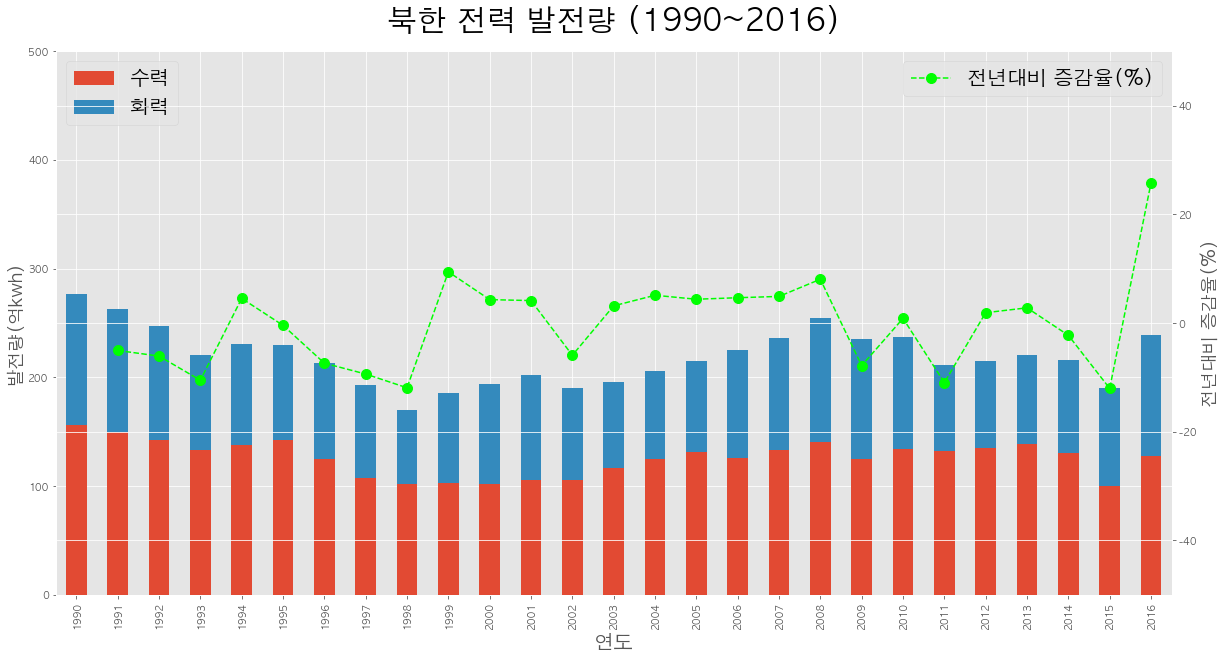

In [12]:
# 2축 그래프 그리기
plt.style.use('ggplot')

ax1 = df[['수력','화력']].plot(kind = 'bar', figsize = (20,10) , stacked = True) # stacked T : 쌓아그리기
ax2 = ax1.twinx() # x축이 쌍둥이 값이다 
ax2.plot(df.index , df.증감율 , ls = '--', marker = 'o', markersize = 10, color = 'lime' , label = '전년대비 증감율(%)') # ls : -- 점선

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50) #증감율 %

ax1.set_xlabel('연도' , size = 20)
ax1.set_ylabel('발전량(억kwh)', size=18)
ax2.set_ylabel('전년대비 증감율(%)' , size=18)

plt.title('북한 전력 발전량 (1990~2016)', size = 30 ,pad=20)
ax1.legend(loc='upper left', fontsize = 20)
ax2.legend(loc='upper right' , fontsize = 20)
plt.show()

---
### 히스토그램(histogram)
: 단위별(컬럼별) 데이터의 빈도수를 그래프로 표현

In [14]:
# Style 서식 지정
plt.style.use("classic")

In [15]:
df = pd.read_csv("../Data/auto-mpg.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [16]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

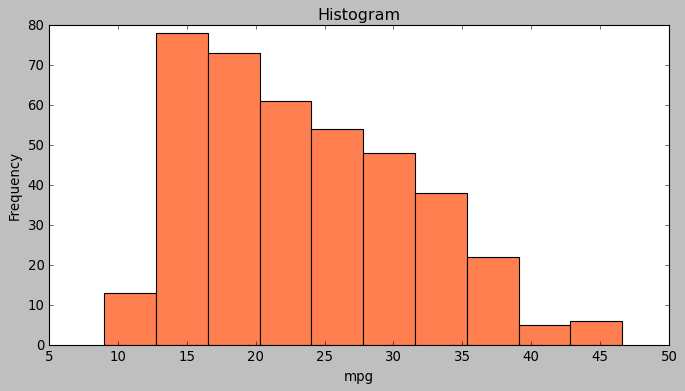

In [21]:
# 연비(mpg) 옆에 대한 히스토그램 그리기 
df['mpg'].plot(
    kind = 'hist',
    bins = 10, # 단위, x축 등분
    color = 'coral',
    figsize = (10,5)
)

# 그래프 그리기
plt.title('Histogram')
plt.xlabel('mpg')

plt.show()

> 그림을 그렸으면 항상 코멘트가 있어야 한다<br>
> 자동차의 연비값은 대부분 좌측편향이 되어 연비가 낮은 구간에 집중되어 있는 경향을 보인다.

---
### 산점도 (Scatter plot) : 영어 명칭에 익숙해 져야 한다!@@
- 서로 다른 두 변수 사이의 관계를 나타낸다.

In [22]:
plt.style.use('default')

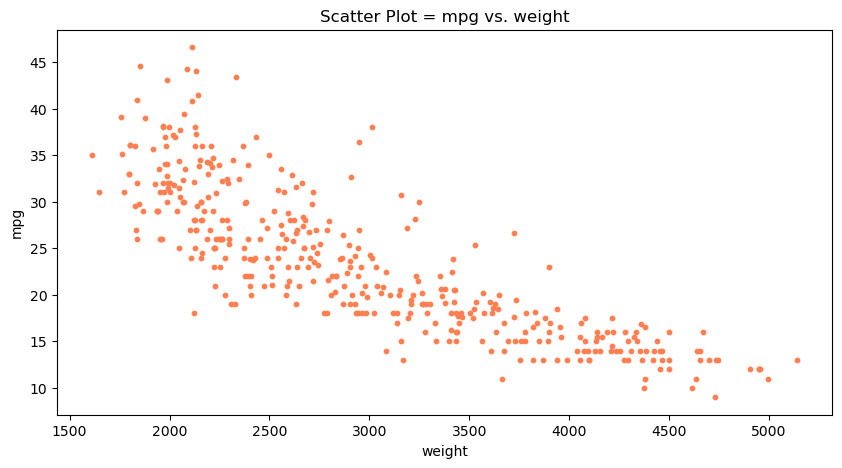

In [27]:
# 연비(mpg) 와 차중(weight) 열에 대한 산점도 그리기 // 옛날 용어 산포도 -> 요즘 용어 산점도 
df.plot(
    kind = 'scatter',
    x = 'weight',
    y = 'mpg',
    c = 'coral', # color
    s = 10, # 점 크기size , size로는 사용 못함 s 로만 사용
    figsize = (10,5)
)

plt.title('Scatter Plot = mpg vs. weight') 

plt.show()

> 차중이 가벼워질수록 연비가 높아지는 좌측 상향의 모습을 보인다. 따라서 차중과 연비는 반비례 관계(역상관)를 가진 것으로 보인다.<br>
> 자동차의 무게가 높을수록 연비는 낮아지는 역상관을 표현하고 있다.

In [39]:
# Cylinder 개수의 상대적 비율을 계산하여 시리즈 생성
# 전체 데이터의 최대값으로 각 데이터를 나눠야 한다
cyliender_size = df.cylinders / df.cylinders.max() * 300 # 눈에 보일 수 있게 크기를 키워준다
# * 300 -> 하이퍼 파라미터 : 내 마음대로 바꿀 수 있으나 기존값에는 영향이 없다. 머신러닝에서는 예측력 차이를 결정할 수 있다.
cyliender_size

0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
393    150.0
394    150.0
395    150.0
396    150.0
397    150.0
Name: cylinders, Length: 398, dtype: float64

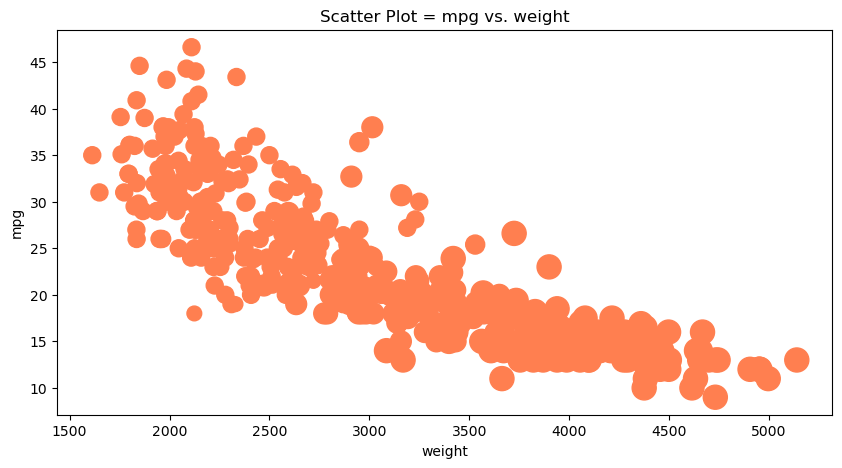

In [36]:
# 연비(mpg) 와 차중(weight) 열에 대한 산점도 그리기 // 옛날 용어 산포도 -> 요즘 용어 산점도 
df.plot(
    kind = 'scatter',
    x = 'weight',
    y = 'mpg',
    c = 'coral', # color
    s = cyliender_size, # 점 크기size , size로는 사용 못함 s 로만 사용
    figsize = (10,5)
)

plt.title('Scatter Plot = mpg vs. weight') 

plt.show()

---
# 버블(Bubble) 차트
: scatter plot에 alpha 옵션을 추가한것

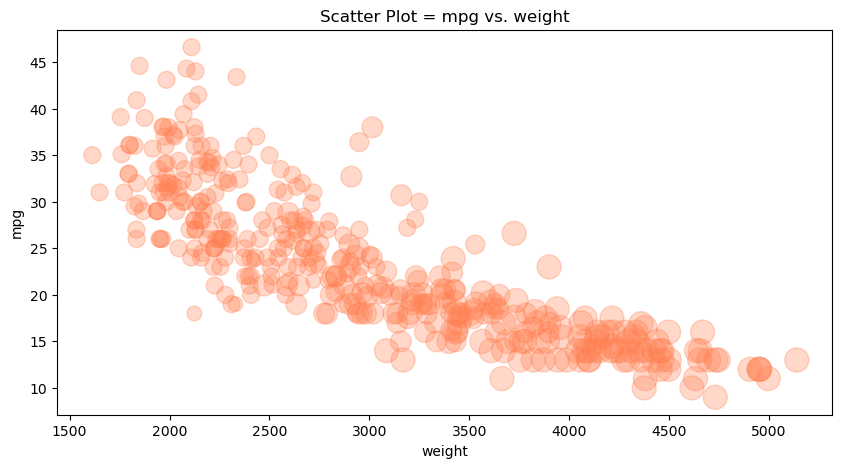

In [38]:
# 연비(mpg) 와 차중(weight) 열에 대한 산점도 그리기 // 옛날 용어 산포도 -> 요즘 용어 산점도 
df.plot(
    kind = 'scatter',
    x = 'weight',
    y = 'mpg',
    c = 'coral', # color
    s = cyliender_size, # 점 크기size , size로는 사용 못함 s 로만 사용
    alpha = 0.3, # 이 옵션의 유무로 버블차트 결정
    figsize = (10,5)
)

plt.title('Scatter Plot = mpg vs. weight') 

plt.show()

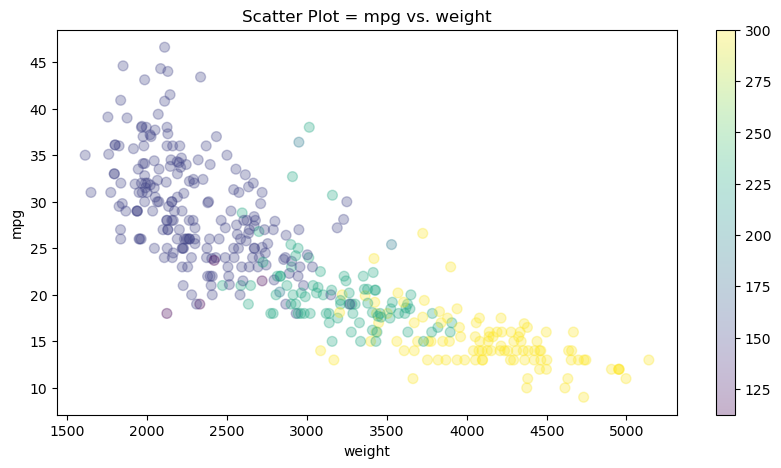

In [45]:
# 연비(mpg) 와 차중(weight) 열에 대한 산점도 그리기 // 옛날 용어 산포도 -> 요즘 용어 산점도 
df.plot(
    kind = 'scatter',
    x = 'weight',
    y = 'mpg',
    c = cyliender_size, # color 
    s = 50, # 점 크기size , size로는 사용 못함 s 로만 사용
    alpha = 0.3, # 이 옵션의 유무로 버블차트 결정
    figsize = (10,5),
    marker = 'o',
    cmap = 'viridis' # color map, ggplot의 컬러팔레트 와 비슷
)

plt.title('Scatter Plot = mpg vs. weight') 

plt.show()

---
### 파이차트(pie chart)
- 원을 파이처럼 나누어서 표현
- 조각의 크기는 해당변수에 속하는 데이터 값의 크기에 비례(%)

### 자동차의 국가별 데이터 갯수를 파이차트로 표현

In [46]:
plt.style.use('default')

In [47]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [48]:
# 국가별 Count 계산
df['count'] = 1
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,count
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1


In [53]:
# Origin 열을 기준으로 그룹화, 합계 연산
df_origin = df.groupby('origin').sum() # count 컬럼만 사용
df_origin

,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [69]:
# index 값을 변경
df_origin.index = ['USA' ,'EU' , 'JAPAN']
df_origin

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


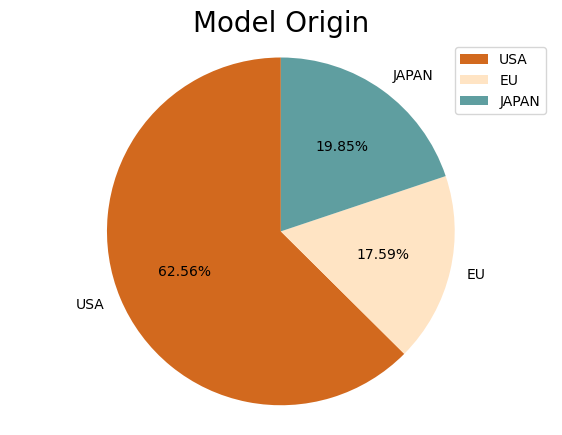

In [79]:
# 파이차트 그리기
df_origin['count'].plot(
    kind = 'pie',
    figsize = (7,5),
    autopct = '%.2f%%', # autopercent , 뒤에 %% 를 붙여줘야 그래프에 % 기호가 표시된다. 
    startangle = 90, # 시작 각도
    colors = ['chocolate' , 'bisque' , 'cadetblue'],
)

plt.title('Model Origin' , size = 20)
plt.axis('equal') # 약간 찌그러지게 나오는 파이차트를 원으로 만드는 옵션
plt.legend(labels = df_origin.index , loc = 'best') # lower right ,left / upper left , right / best
plt.ylabel('') # ylabel 없앰
plt.show()


---
### 박스플롯(boxplot)
- 범주형 데이터의 분포를 파악
### 제조 국가별 연비 분포 박스플롯

In [80]:
plt.style.use('seaborn-poster')

In [82]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

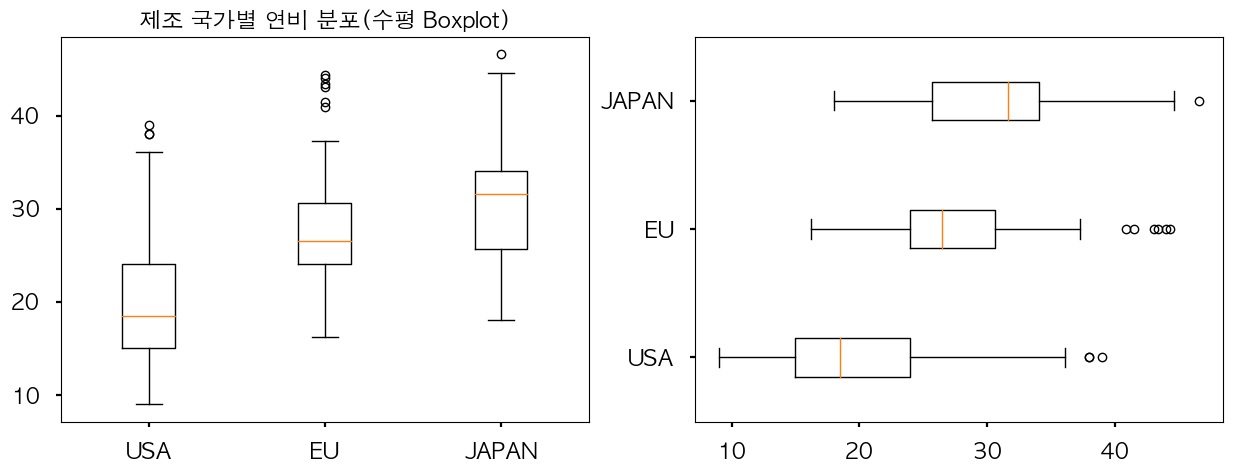

In [91]:
# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1) # 수직 박스플랏
ax2 = fig.add_subplot(1,2,2) # 수평 박스플랏

# 수직 boxplot
ax1.boxplot(
    x = [
        df[df['origin'] == 1]['mpg'], # 국가명이 1인 연비
        df[df['origin'] == 2]['mpg'], # 국가명이 2인 연비
        df[df['origin'] == 3]['mpg'], # 국가명이 3인 연비
    ],
    labels = df_origin.index
)
ax1.set_title('제조 국가별 연비 분포(수직 Boxplot)' , size = 16)

# 수평 boxplot
ax2.boxplot(
    x = [
        df[df['origin'] == 1]['mpg'], # 국가명이 1인 연비
        df[df['origin'] == 2]['mpg'], # 국가명이 2인 연비
        df[df['origin'] == 3]['mpg'], # 국가명이 3인 연비
    ],
    labels = df_origin.index,
    vert = False, # vertical
)
ax1.set_title('제조 국가별 연비 분포(수평 Boxplot)' , size = 16)

# 원점 기준으로 순서대로 첫번째 설정 (1,2,3)
plt.show()

> 미국차는 무겁지만 튼튼, 연비는 구림, 일본차는 가볍 와장창, 연비는 좋음

In [86]:
# 연습 
df[df['origin'] == 1]['mpg'] 

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    27.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 249, dtype: float64

### 그래프 참고 사이트 
https://www.python-graph-gallery.com/

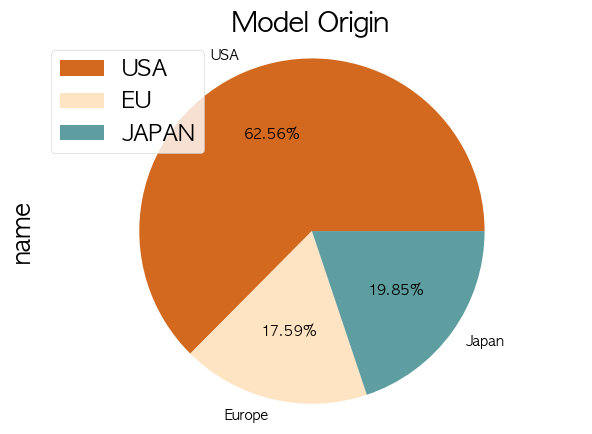

In [92]:
# 자동차의 국가별 데이터 갯수 파이차트
df.groupby('origin').count()['name'].plot(
    kind='pie',
    autopct='%1.2f%%',
    figsize=(7, 5),
    fontsize=10,
    colors = ['chocolate', 'bisque', 'cadetblue'],
    labels=['USA', 'Europe', 'Japan'],
)
plt.title('Model Origin', fontsize=20)
plt.axis('equal')
plt.legend(labels=['USA', 'EU', 'JAPAN'], loc='upper left')
plt.show()

---